In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

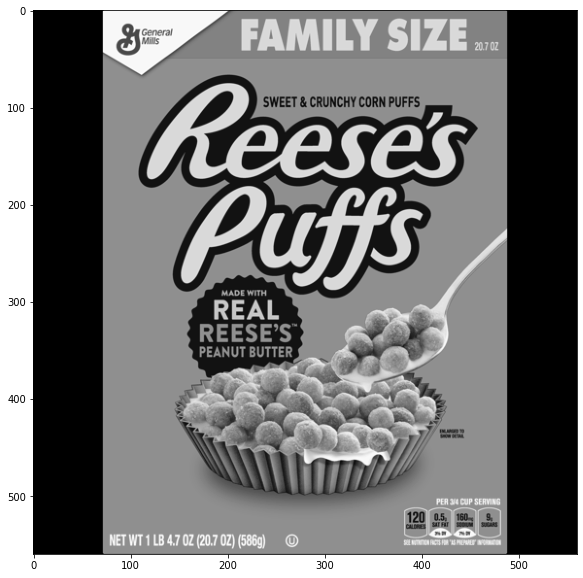

In [37]:
reeses = cv2.imread('DATA/reeses_puffs.png', 0)
display(reeses)

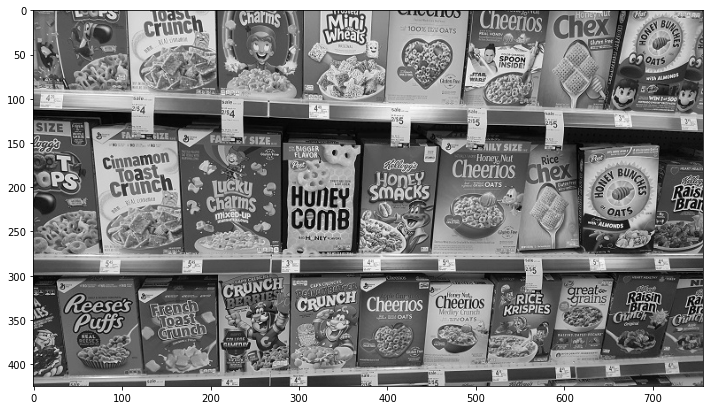

In [38]:
cereals = cv2.imread('DATA/many_cereals.jpg', 0)
display(cereals)

## Brute Force Detector

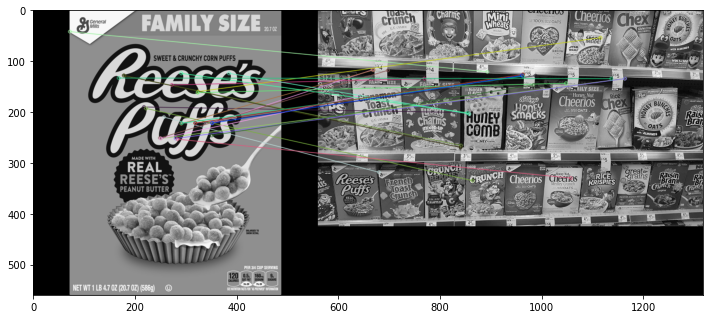

In [39]:
orb = cv2.ORB_create()  #DetectorObject

kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

##Matching Object

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(des1, des2)

#sort the matches now
matches = sorted(matches, key=lambda x:x.distance) #matches.distance method

reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

display(reeses_matches)

## SIFT DETECTOR

In [40]:
#pip install opencv-python==3.4.2.17

In [41]:
#pip install opencv-contrib-python==3.4.2.17

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()


kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1, des2, k = 2) #gives 2 best matches
matches

In [ ]:
good = []

for match1, match2 in matches:
    # If match 1 distance is less than 75% of match 2 distance
    # then descriptor was a good match, lets keep it
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [ ]:
print(len(good))
print(len(matches))

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [ ]:

#FLANN - Fast Library for Approximate Nearest Neighbors  - Faster than Brute Force Matcher -- (Good but not best)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

In [ ]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

In [ ]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(flann_matches)

In [ ]:
matchesMask = [[0, 0] for i in range(len(matches))]

for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]      

In [ ]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0)
display(flann_matches)

In [ ]:
draw_params = dict(matchColor = (0, 255, 0),
                  singlepointColor = (255, 0, 0),
                  matchesMask = matchesMask,
                  flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, flags=2)
display(flann_matches)

In [ ]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)